In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
sb.set_style("whitegrid")
import math
import statsmodels.api
from statsmodels.api import formula
import scipy as sp
import missingno as msno # missing data visualization
import pandas_profiling

In [2]:
from sklearn.decomposition import FactorAnalysis


In [3]:
import os

In [4]:
os.chdir("F:\Dataset")

In [5]:
data=pd.read_excel("Data.xls",names=["S.No","v1","v2","v3","v4","v5","v6","v7","v8","v9","v10","v11","v12","v13","v14","v15",'Q2 - Mobile Phn Brand', 'Q3 - Favourite Soft Drink',
       'Q4 - Newspaper read', 'Q5 - Shower Gel', 'Q6 - Hand sanitizers',
       'Q7 - Face washes', 'Q8 - Hair conditioner', 'Q9 - Tea_Coffee',
       'Q10 - Gender', 'Q11 - Occupation'] )

In [6]:
data.head()
data.columns

Index(['S.No', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'Q2 - Mobile Phn Brand',
       'Q3 - Favourite Soft Drink', 'Q4 - Newspaper read', 'Q5 - Shower Gel',
       'Q6 - Hand sanitizers', 'Q7 - Face washes', 'Q8 - Hair conditioner',
       'Q9 - Tea_Coffee', 'Q10 - Gender', 'Q11 - Occupation'],
      dtype='object')

In [7]:

data.isna().sum()

S.No                          0
v1                            2
v2                            2
v3                           12
v4                           14
v5                           13
v6                           11
v7                           11
v8                           19
v9                           14
v10                          11
v11                          11
v12                          14
v13                          10
v14                           9
v15                           9
Q2 - Mobile Phn Brand         3
Q3 - Favourite Soft Drink     3
Q4 - Newspaper read           3
Q5 - Shower Gel               7
Q6 - Hand sanitizers          8
Q7 - Face washes              7
Q8 - Hair conditioner         9
Q9 - Tea_Coffee               7
Q10 - Gender                  6
Q11 - Occupation              6
dtype: int64

In [8]:

data.isna().sum().sort_values(ascending=False)

v8                           19
v4                           14
v9                           14
v12                          14
v5                           13
v3                           12
v7                           11
v6                           11
v11                          11
v10                          11
v13                          10
Q8 - Hair conditioner         9
v15                           9
v14                           9
Q6 - Hand sanitizers          8
Q7 - Face washes              7
Q5 - Shower Gel               7
Q9 - Tea_Coffee               7
Q11 - Occupation              6
Q10 - Gender                  6
Q2 - Mobile Phn Brand         3
Q3 - Favourite Soft Drink     3
Q4 - Newspaper read           3
v2                            2
v1                            2
S.No                          0
dtype: int64

In [9]:
19/664

0.0286144578313253

In [10]:
data[data.isna().any(axis=1)].shape

(44, 26)

In [11]:
data.columns

Index(['S.No', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'Q2 - Mobile Phn Brand',
       'Q3 - Favourite Soft Drink', 'Q4 - Newspaper read', 'Q5 - Shower Gel',
       'Q6 - Hand sanitizers', 'Q7 - Face washes', 'Q8 - Hair conditioner',
       'Q9 - Tea_Coffee', 'Q10 - Gender', 'Q11 - Occupation'],
      dtype='object')

In [12]:
data1=data.iloc[:, 1:16]

In [13]:
data1.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15'],
      dtype='object')

In [14]:
data1[data1.isna().any(axis=1)].shape

(35, 15)

In [15]:
35/664

0.05271084337349398

In [16]:
data1[data1.isna().all(axis=1)].shape

(2, 15)

In [17]:

data1.isna().sum().sort_values(ascending=False)

v8     19
v12    14
v9     14
v4     14
v5     13
v3     12
v11    11
v10    11
v7     11
v6     11
v13    10
v15     9
v14     9
v2      2
v1      2
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import missingno as msno

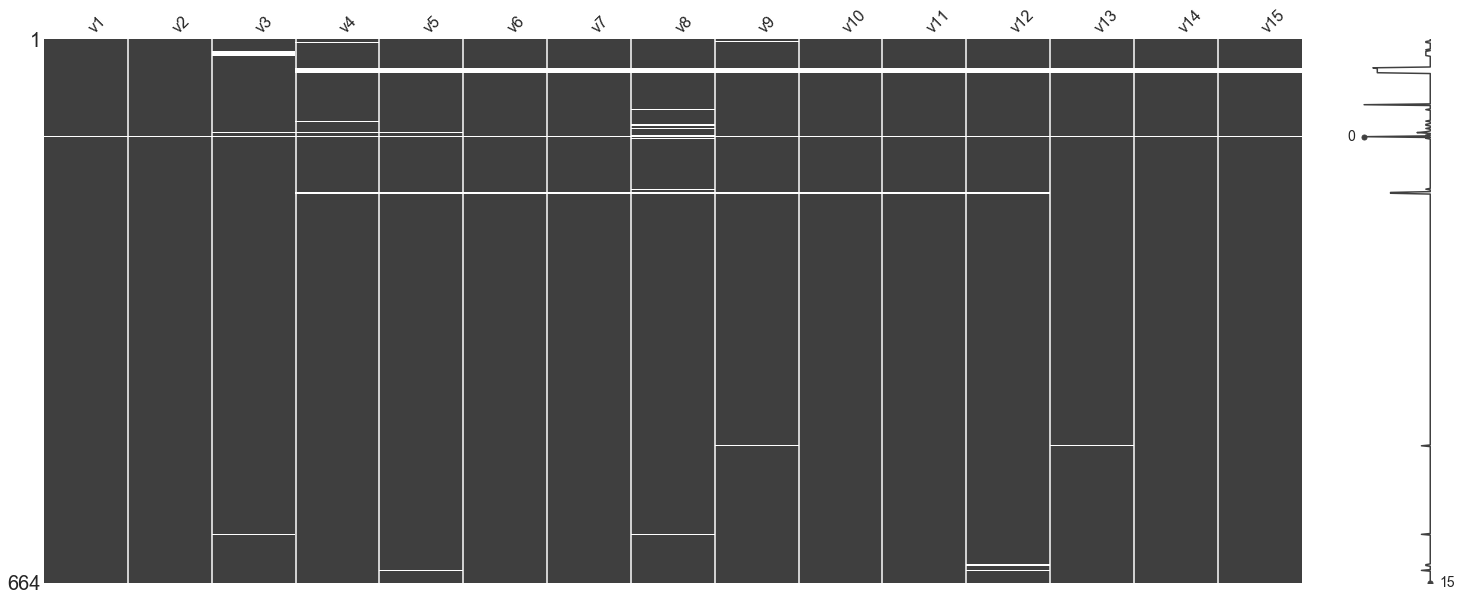

In [19]:
msno.matrix(data1);

In [20]:
from scipy.stats import chisquare
import scipy.stats
corr1,pval=scipy.stats.spearmanr(data1,nan_policy="omit")
corr=corr1.flatten().reshape(15,15)
corrDF=pd.DataFrame(data=corr, index=["v1","v2","v3","v4","v5","v6","v7","v8","v9","v10","v11","v12","v13","v14","v15"],columns=["v1","v2","v3","v4","v5","v6","v7","v8","v9","v10","v11","v12","v13","v14","v15"])
corrDF[corrDF>=0.40]

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15
v1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [21]:
pvalDF=pd.DataFrame(data=pval,index=["v1","v2","v3","v4","v5","v6","v7","v8","v9","v10","v11","v12","v13","v14","v15"],columns=["v1","v2","v3","v4","v5","v6","v7","v8","v9","v10","v11","v12","v13","v14","v15"] )
pvalDF[pvalDF<0.05]

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15
v1,0.000000e+00,1.891849e-05,7.046632e-12,1.287679e-02,NaN,NaN,NaN,NaN,4.334275e-10,1.148090e-06,NaN,1.173460e-04,1.347787e-04,2.498395e-06,NaN
v2,1.891849e-05,0.000000e+00,NaN,3.443390e-05,1.082748e-03,NaN,1.197968e-04,NaN,2.660680e-05,1.022878e-02,1.077730e-03,1.159820e-07,6.903128e-07,NaN,5.911948e-20
v3,7.046632e-12,NaN,0.000000e+00,7.248461e-03,NaN,1.909842e-03,NaN,NaN,1.597981e-02,7.927870e-15,NaN,NaN,NaN,1.240395e-04,NaN
v4,1.287679e-02,3.443390e-05,7.248461e-03,0.000000e+00,3.701632e-11,8.938308e-09,2.113588e-08,3.322087e-09,8.332532e-03,5.512409e-05,1.051970e-04,NaN,1.061993e-03,NaN,3.187397e-21
v5,NaN,1.082748e-03,NaN,3.701632e-11,0.000000e+00,3.622055e-05,1.040820e-02,1.425343e-03,1.446308e-02,5.922921e-05,NaN,NaN,NaN,4.054982e-10,6.666511e-06
v6,NaN,NaN,1.909842e-03,8.938308e-09,3.622055e-05,0.000000e+00,2.563675e-05,NaN,2.344925e-08,2.630192e-04,7.898660e-07,1.473374e-03,NaN,NaN,3.641468e-07
v7,NaN,1.197968e-04,NaN,2.113588e-08,1.040820e-02,2.563675e-05,0.000000e+00,2.421158e-10,9.874454e-03,NaN,1.548343e-10,2.185480e-10,2.002399e-05,4.382162e-04,2.084025e-18
v8,NaN,NaN,NaN,3.322087e-09,1.425343e-03,NaN,2.421158e-10,0.000000e+00,1.077121e-07,5.462736e-08,1.487934e-03,6.777169e-13,2.881717e-08,6.054005e-06,1.522153e-06
v9,4.334275e-10,2.660680e-05,1.597981e-02,8.332532e-03,1.446308e-02,2.344925e-08,9.874454e-03,1.077121e-07,0.000000e+00,3.443946e-03,NaN,5.799213e-10,6.411131e-05,6.432722e-04,4.924769e-03
v10,1.148090e-06,1.022878e-02,7.927870e-15,5.512409e-05,5.922921e-05,2.630192e-04,NaN,5.462736e-08,3.443946e-03,0.000000e+00,NaN,NaN,4.356096e-03,6.229134e-05,NaN


In [22]:
corr2=pd.DataFrame.corr(data1, method="spearman")
corr2[corr2>=0.40]

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15
v1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000391B651A58>,
      dtype=object)

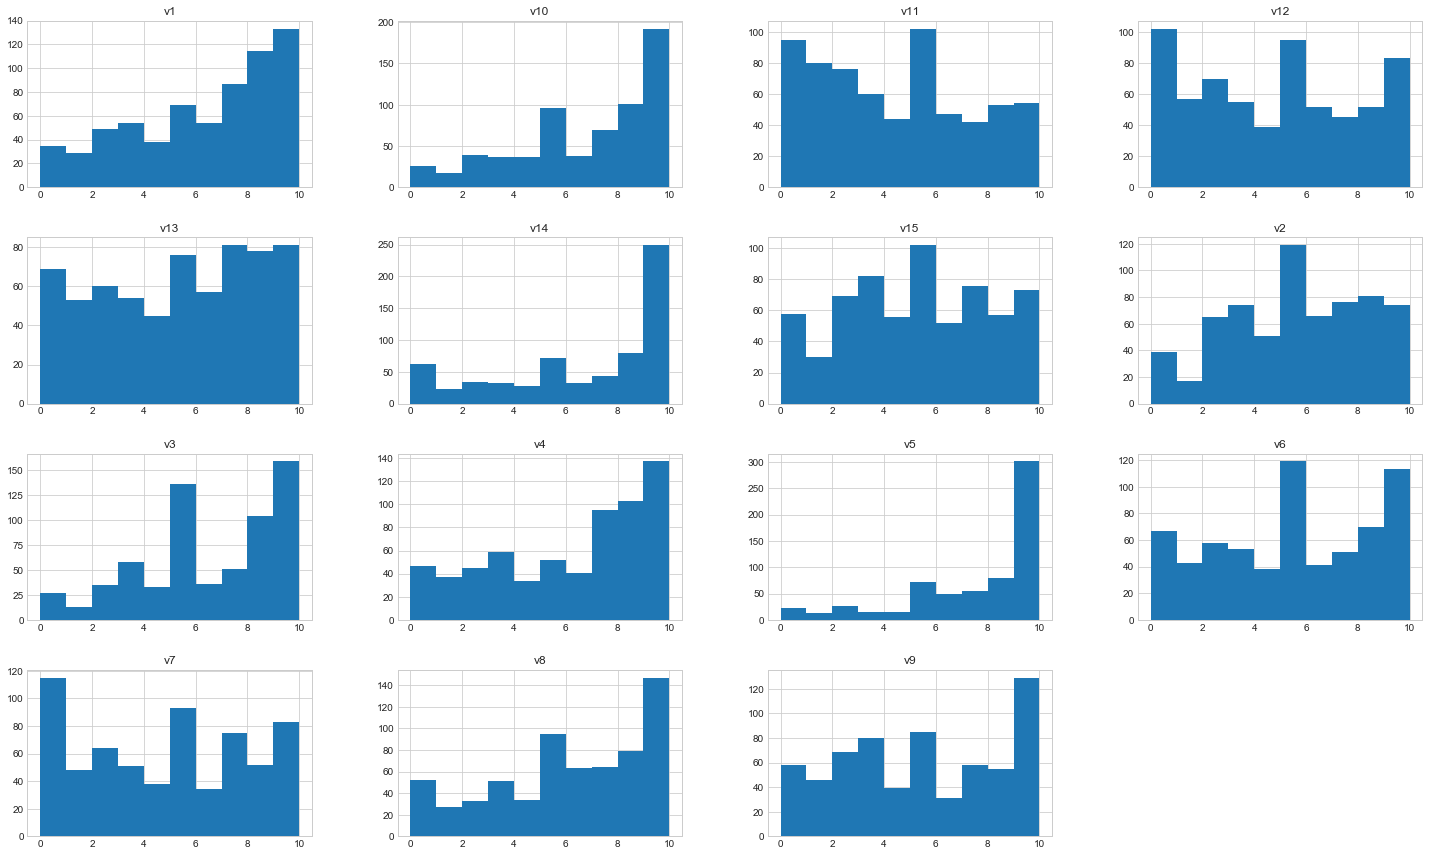

In [23]:
data1.hist(grid=True, figsize=(25,15))

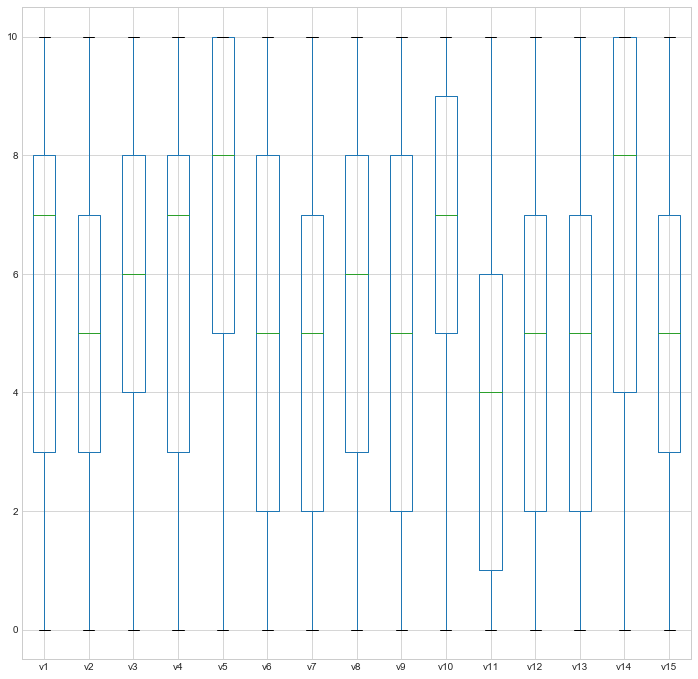

In [24]:
data1.boxplot(figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000391C786EB8>,
      dtype=object)

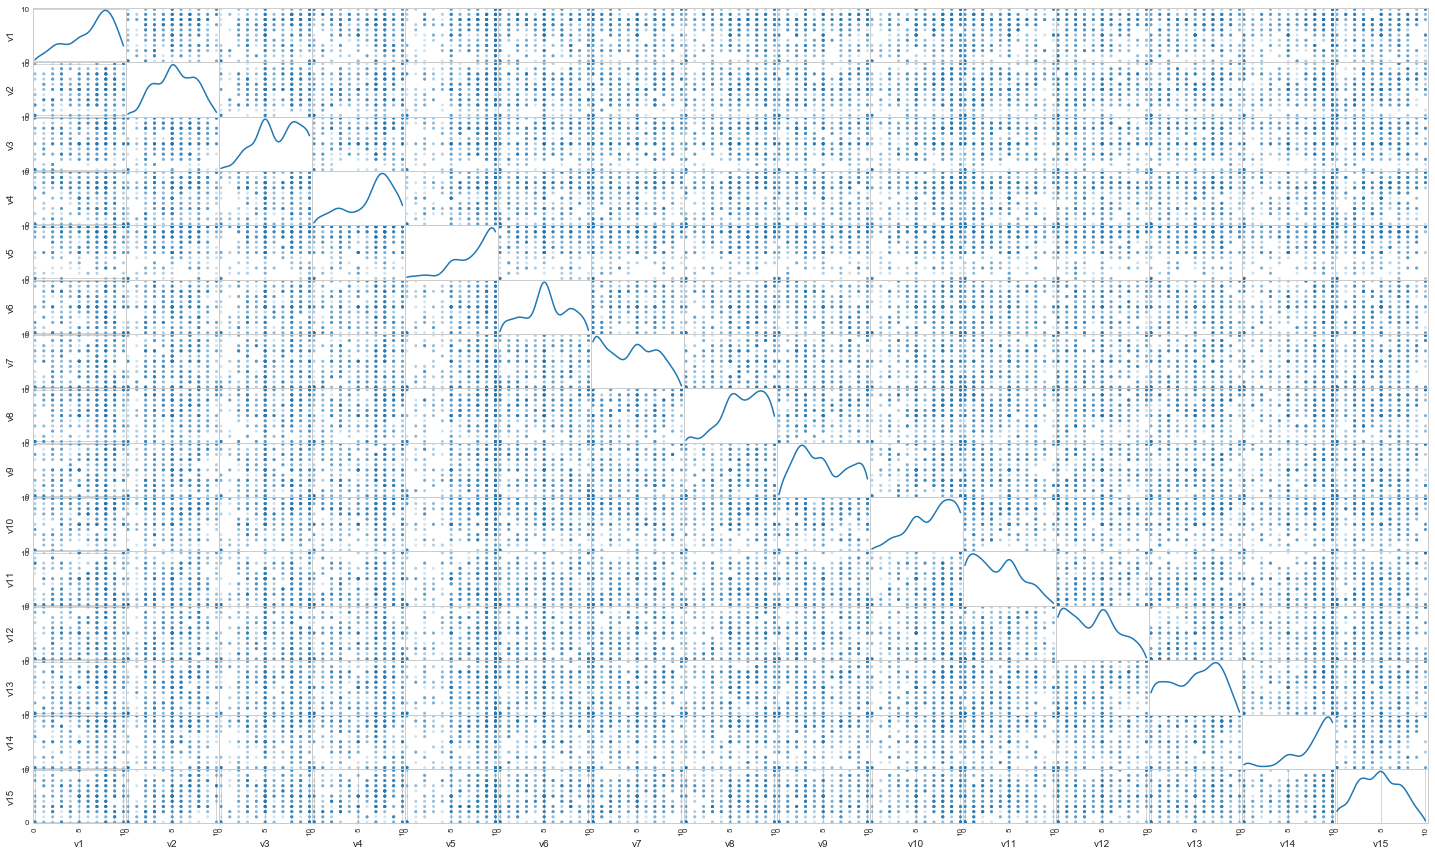

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(data1, alpha=0.2, figsize=(25, 15), diagonal='kde')

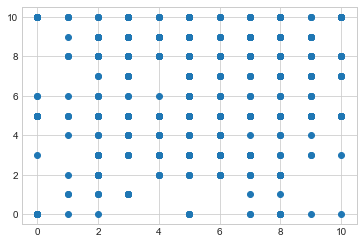

In [26]:
plt.scatter(data1.iloc[:,1], data1.iloc[:,2])


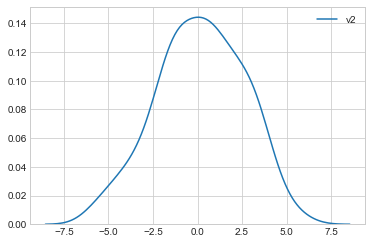

In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
data11=data1.iloc[:,0:2]
data11.dropna(inplace=True)
data11x=data11.iloc[:,0]
data11y=data11.iloc[:,1]
x_train=data11x.iloc[:450]
x_train=np.array(x_train).reshape(-1,1)
x_train
x_test=data11x.iloc[451:]
x_test=np.array(x_test).reshape(-1,1)
x_test
y_train=data11y.iloc[:450]
y_test=data11y.iloc[451:]




model = linear_model.LinearRegression()
model.fit(x_train, y_train)

ypred=model.predict(x_test)
mean_squared_error(y_test, ypred)
residual=y_test-ypred
sb.kdeplot(residual)


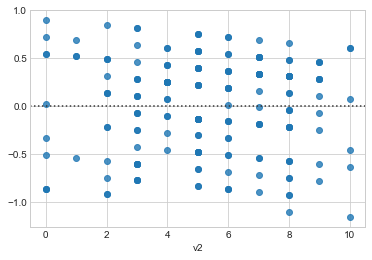

In [48]:
sb.residplot(y_test,ypred)

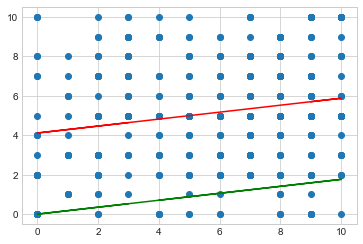

In [29]:
beta=model.coef_

plt.scatter(x_train, y_train)
plt.plot(x_test, ypred, color='red')
x_actual = x_train
y_actual = x_train*beta
plt.plot(x_actual, y_actual, color='green')


In [30]:
r2_score(y_test, ypred)

0.015246821800355526

In [31]:
model.coef_

array([0.1765013])

In [32]:
table1=pd.DataFrame(np.mean(data1,axis=0))
table2=pd.DataFrame(np.std(data1,axis=0))
table=pd.concat([table1, table2], axis=1)
table

,0,0
v1,5.854985,2.892348
v2,5.202417,2.676088
v3,6.128834,2.816248
v4,5.756923,3.107211
v5,7.298003,2.806123
v6,5.070444,3.132784
v7,4.405819,3.205914
v8,5.747287,3.026961
v9,5.033846,3.199340
v10,6.415008,2.864616


In [59]:
from sklearn.svm import SVR
regressor=SVR(kernel='linear',degree=3)
regressor.fit(x_train, y_train)
pred2=regressor.predict(x_test)
print(regressor.coef_)
print(mean_squared_error(y_test,pred2))
regressor.score(x_test, y_test)

[[0.2]]
5.9421327014217855


0.01537259937472335

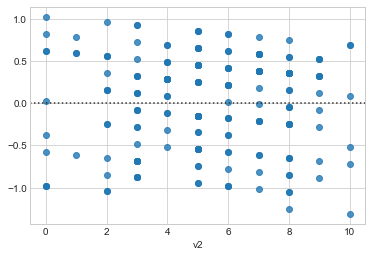

In [60]:
sb.regression.residplot(y_test, pred2)

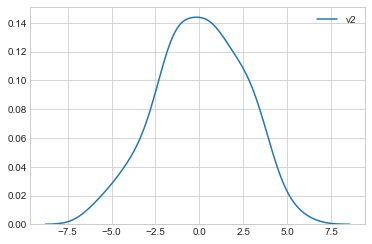

In [61]:
residual=y_test-pred2
sb.kdeplot(residual)

In [56]:
regressor2=SVR(kernel="rbf",epsilon=1.0, degree=4)
regressor2.fit(x_train, y_train)
pred3=regressor2.predict(x_test)
print(mean_squared_error(y_test,pred3))
regressor2.score(x_test, y_test)

5.9030092167163986


0.02185546621471346

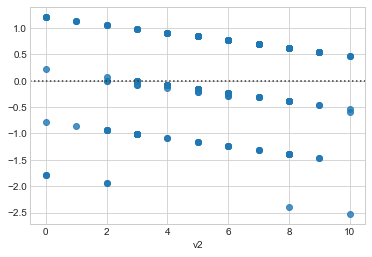

In [57]:
sb.residplot(y_test,pred3)

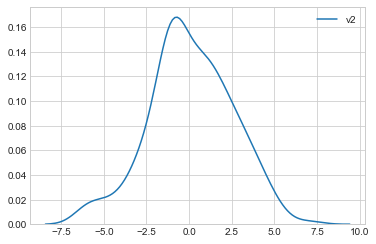

In [58]:
residual=y_test-pred3
sb.kdeplot(residual)

In [ ]:

plt.scatter(x_train, y_train)

In [ ]:
data1.isna().sum().sort_values(ascending=False)

In [ ]:
data1.describe()

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# scaler = RobustScaler()
# scaled_df = scaler.fit_transform(data1)
# scaled_data1 = pd.DataFrame(scaled_df)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
reg=KNeighborsRegressor(4, weights='distance', metric=distance)

In [ ]:
msno.heatmap(data1, figsize=(15,15))

In [ ]:
msno.matrix(data1.iloc[151:371,:])

In [ ]:
msno.bar(data1,log=True)

In [ ]:
missing=data1[data1.isna().any(axis=1)]
missing


## 


To filter out columns that contain zero values, you can use

df2 = df.loc[:, (df != 0).all(axis=0)]


To filter out rows that contain zero values, you can use

df2 = df.loc[(df != 0).all(axis=1), :]




In [ ]:
data_with0 = data1.loc[(data1== 0).all(axis=1), :]
data_with0


In [ ]:
data_with10 = data1.loc[(data1== 10).all(axis=1), :]
data_with10

In [ ]:
data1.loc[(data1== 5).all(axis=1), :]

In [ ]:
data1.loc[(data1== 1).all(axis=1), :]

In [ ]:
allna=missing.loc[missing.isna().all(axis=1),:]

In [ ]:
!pip install impyute

In [79]:
import impyute
from impyute import complete_case, deletion, em, fast_knn, mice, imputation, mean, median

In [ ]:
distance=scipy.spatial.distance.mahalanobis

In [ ]:
!pip install ecos  
!pip install CVXcanon 

In [ ]:
!pip install fancyimpute           

In [ ]:
import fancyimpute

In [77]:
from fancyimpute import KNN, MatrixFactorization, matrix_factorization 

ImportError: cannot import name 'KNNimpute'

In [69]:
import statsmodels

In [71]:
statsmodels.imputation.mice.MICEData

statsmodels.imputation.mice.MICEData

AttributeError: 'KNN' object has no attribute 'complete'

In [75]:
KNN

AttributeError: 'KNN' object has no attribute 'complete'

In [ ]:
from sklearn.decomposition import PCA, KernelPCA